# Sloupcové grafy s více kategoriemi

Nejprve musíme provést import všech potřebných knihoven z projektu Incanter

In [5]:
(ns simple-plot
  (:use (incanter core stats charts)))

Pomocná funkce, která nám umožní zjednodušit zobrazení grafů v Jupyter Notebooku

In [6]:
(defn display
    [chart]
    (.createBufferedImage chart 640 480))

#'simple-plot/display

Sloupcové grafy popsané v předchozích dvou kapitolách byly ve skutečnosti velmi jednoduché, protože sloužily pro zobrazení hodnot z jediné kategorie (v našem případě se jednalo o výsledky hodu kostkou). V praxi se ovšem velmi často setkáme s požadavkem, aby se do sloupcového grafu vykreslily hodnoty z několika kategorií. Pěkným příkladem z praxe může být například graf s výsledky benchmarků. Pokud budete chtít vytvořit podobný typ grafu, je nutné makru bar-chart předat i parametr pojmenovaný :group-by s definicí jednotlivých kategorií. Opět se podívejme na demonstrační příklad, který tentokrát vznikl úpravou příkladu převzatého přímo z dokumentace k projektu Incanter.

Nejprve si vytvoříme sekvenci obsahující kategorie, které se ovšem budou opakovat, aby byl počet prvků v sekvenci totožný s počtem všech vykreslovaných hodnot. K tomuto účelu použijeme funkci repeat, která bude třikrát opakovat předaný seznam (nebo jinou sekvenci):

In [8]:
(def seasons (mapcat identity (repeat 3 ["jaro" "léto" "podzim" "zima"])))

#'simple-plot/seasons

Výsledkem bude sekvence s dvanácti prvky:

In [9]:
seasons

("jaro" "léto" "podzim" "zima" "jaro" "léto" "podzim" "zima" "jaro" "léto" "podzim" "zima")

Dále vytvoříme druhou sekvenci, tentokrát obsahující roky, pro které se má graf vykreslit. Opět získáme sekvenci s dvanácti hodnotami, tentokrát se ovšem v sekvenci opakuje každá hodnota čtyřikrát (stále opakujeme jen tři roky):

In [10]:
(def years (mapcat identity (repeat 4 [2016 2017 2018 2019 2020])))

#'simple-plot/years

A konečně následuje sekvence s vlastními hodnotami, které se mají vykreslit do grafu. Pro jednoduchost zde použijeme generátor náhodných hodnot s rovnoměrným rozdělením:

In [12]:
(def values (sample-uniform 12 :integers true :max 100))

#'simple-plot/values

Samotné vykreslení grafu je již poměrně snadné, ovšem nesmíme přitom zapomenout na předání již výše zmíněného parametru :group-by, aby se dosáhlo korektního seskupení hodnot podle kategorií (ostatně schválně si vyzkoušejte, jak bude graf vypadat, pokud tento parametr makru bar-chart nepředáte):

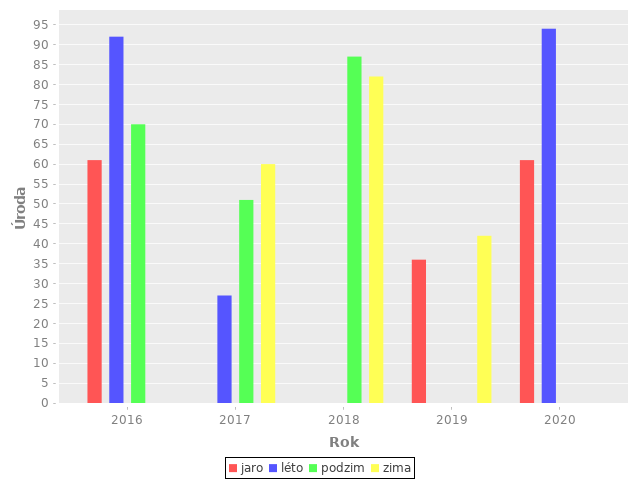

In [13]:
(display (bar-chart years values :group-by seasons :legend true :x-label "Rok" :y-label "Úroda"))